In [16]:
!pip install psycopg2-binary


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 1.7 MB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 2.1 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.1

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\opencv-env\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\User\anaconda3\envs\opencv-env\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\User\anaconda3\envs\opencv-env\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\User\anaconda3\envs\opencv-env\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "C:\Users\User\anaconda3\envs\opencv-env\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\User\anaconda3\envs\opencv-env\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\User\anaconda3\envs\opencv-env\l

In [18]:
!pip install pandas psycopg2 matplotlib seaborn plotly

In [21]:
# Step 1: Import Libraries
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# For nicer plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Step 2: Connect to PostgreSQL
try:
    conn = psycopg2.connect(
        host="localhost",
        port=5432,
        user="postgres",
        password="2005",
        database="postgres"
    )
    print("✅ Connection successful!")
except Exception as e:
    print("❌ Connection failed:", e)

✅ Connection successful!


In [23]:
# Step 3: Read data from product_data table
query = "SELECT * FROM product_collection.product_data;"
df = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_25508\4114978331.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [24]:
# Step 4: Inspect data
print("Columns in DataFrame:", df.columns)
df.head()

Columns in DataFrame: Index(['id', 'start', 'end_time', 'date', 'outlet_code', 'outlet_name',
       'province', 'outlet_type', 'contact_name', 'phone', 'product',
       'address', 'sku_code', 'availability', 'price', 'stock_on_hand',
       'facing_count', 'posm_available', 'posm_condition', 'competitor',
       'competitor_price', 'competitor_promotion', 'sales_trend',
       'estimated_weekly_sales', 'satisfaction_score', 'issue_flag',
       'feedback', 'total_sales'],
      dtype='object')


,id,start,end_time,date,outlet_code,outlet_name,province,outlet_type,contact_name,phone,...,posm_condition,competitor,competitor_price,competitor_promotion,sales_trend,estimated_weekly_sales,satisfaction_score,issue_flag,feedback,total_sales
0,1,2025-11-19 13:43:37.505,2025-11-19 13:44:51.859,2024-10-08,tyu09,ty shop,Battambang,Retailer,tyuu,098756787,...,Good,coca,5678.0,Buy 2 Get 1,Stable,34567.0,7,No,slow,8.489655e+07
1,2,2025-11-19 13:44:51.873,2025-11-19 13:50:48.898,2024-07-17,yuo75,rom store,Ratanakiri,Retailer,romjr,987654567,...,Missing,krud,67890.0,Discount,Stable,56789.0,8,Yes,fast,3.224479e+08
2,3,2025-11-19 13:50:48.911,2025-11-19 13:52:27.561,2024-08-22,uio90,tyyy market,Preah Vihear,Supermarket,tyyyJR,098765678,...,Fair,Cheerr,6900.0,Gift,Increasing,5678.0,7,Yes,good,5.607915e+10
3,4,2025-11-19 13:52:27.569,2025-11-19 14:30:03.046,2025-01-02,OUT001,Lucky Store,Phnom Penh,Minimart,Sopheak,987654456,...,Good,Hunumam beer,3300.0,Discount,Stable,120.0,6,No,Strong sales,4.200000e+05
4,5,2025-11-19 14:30:03.067,2025-11-19 14:33:35.872,2025-01-03,OUT002,Dara Mart,Battambang,Minimart,Dara,098764345,...,Fair,Pro vida,400.0,Buy 2 Get 1,Decreasing,100.0,8,No,Out of stock,1.240000e+04


In [25]:
# Step 5: Clean data (optional, depending on nulls or types)
# Example: convert numeric columns to numeric types
numeric_cols = ['competitor_price', 'estimated_weekly_sales', 'facing_count', 
                'price', 'satisfaction_score', 'stock_on_hand', 'total_sales']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [26]:
# Step 6: Basic Sales Analysis
# Total sales by product
sales_by_product = df.groupby('product')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_product)

product
IZE Cola                  5.609848e+10
Wurkz Energy Drink        3.257251e+08
Cambodia Water            8.548335e+07
Kudo Lager                7.623570e+07
IZE Lemon                 3.167162e+07
Wurkz Icy Cool            2.025000e+07
Cambodia Lite             1.479708e+06
IZE Fruit Punch           8.501100e+05
IZE Soda                  5.400000e+05
Cambodia beer             4.200000e+05
Exprez Strawberry         3.360000e+05
Exprez Melon juice        2.700000e+05
Cambodia Premium Draft    2.280000e+05
Name: total_sales, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_25508\2848677030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top3_products.index, y=top3_products.values, palette="viridis")


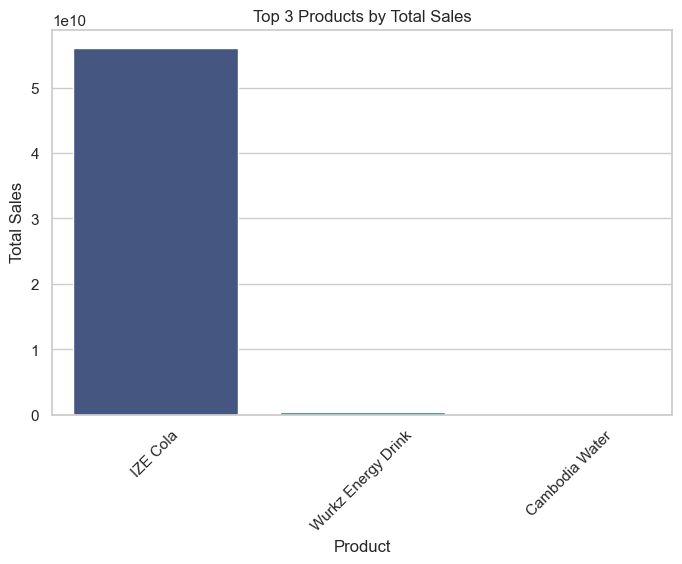

In [34]:
# 7a: Bar chart - Total sales by top 3 products
top3_products = sales_by_product.head(3)

plt.figure(figsize=(8,5))
sns.barplot(x=top3_products.index, y=top3_products.values, palette="viridis")
plt.title("Top 3 Products by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.show()


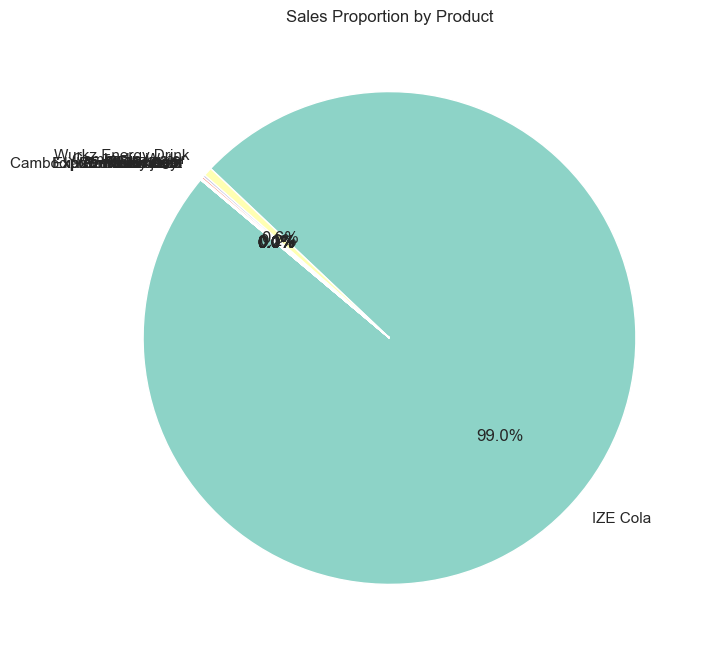

In [28]:
# 7b: Pie chart - Sales proportion by product
plt.figure(figsize=(8,8))
sales_by_product.plot.pie(autopct='%1.1f%%', startangle=140, cmap="Set3")
plt.ylabel("")
plt.title("Sales Proportion by Product")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25508\1171253421.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_satisfaction.index, y=avg_satisfaction.values, palette="coolwarm")


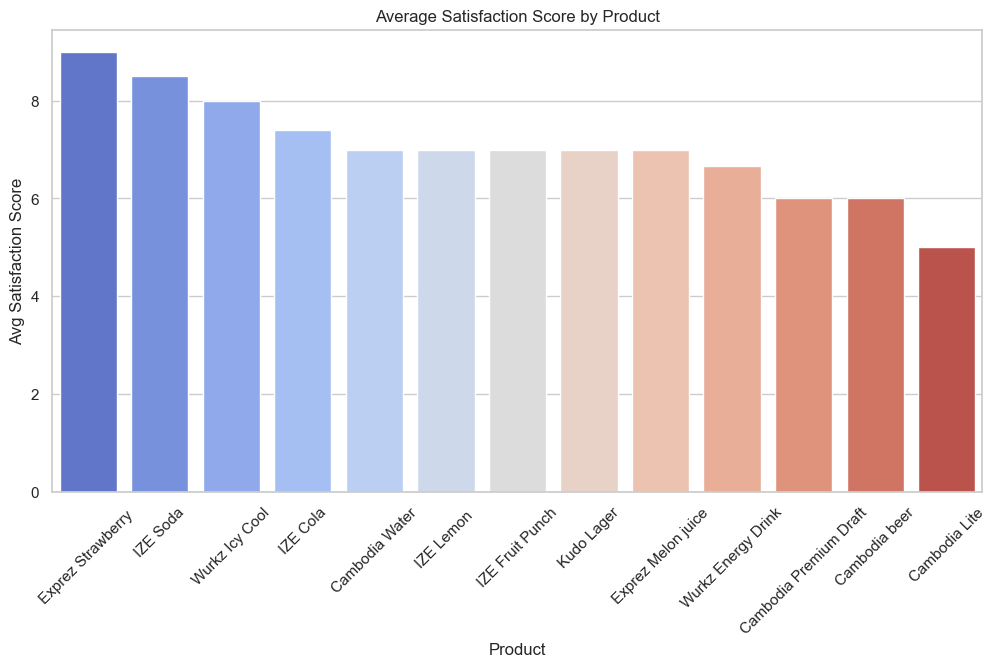

In [29]:
# 7c: Column chart - Average satisfaction score by product
if 'satisfaction_score' in df.columns:
    avg_satisfaction = df.groupby('product')['satisfaction_score'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(x=avg_satisfaction.index, y=avg_satisfaction.values, palette="coolwarm")
    plt.title("Average Satisfaction Score by Product")
    plt.ylabel("Avg Satisfaction Score")
    plt.xlabel("Product")
    plt.xticks(rotation=45)
    plt.show()

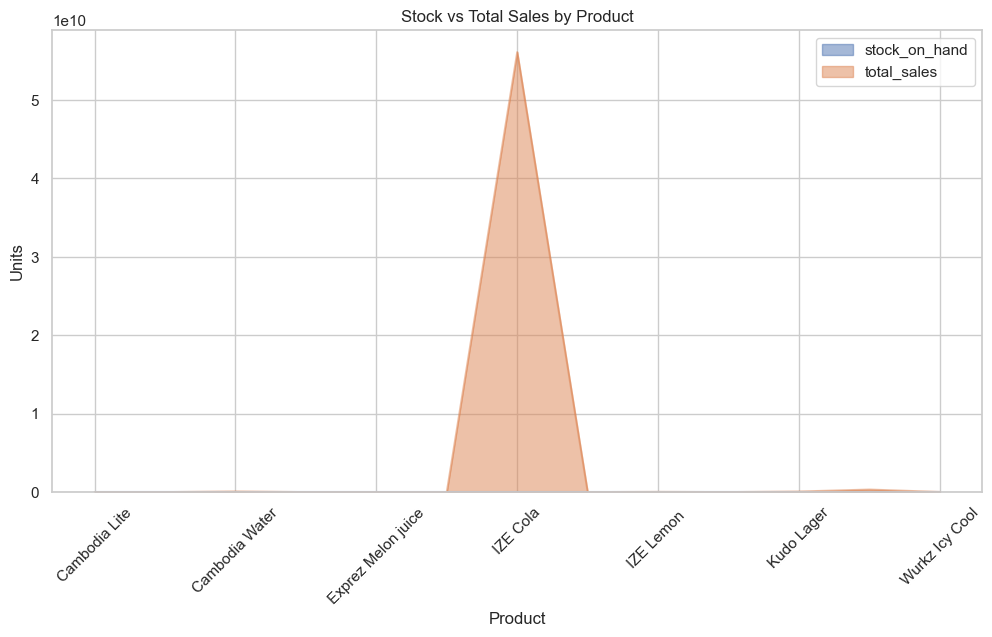

In [30]:
# 7d: Area chart - Stock vs Total Sales over products
stock_sales = df.groupby('product')[['stock_on_hand','total_sales']].sum()
stock_sales.plot.area(alpha=0.5)
plt.title("Stock vs Total Sales by Product")
plt.ylabel("Units")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25508\1841573593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_province.index, y=sales_by_province.values, palette="magma")


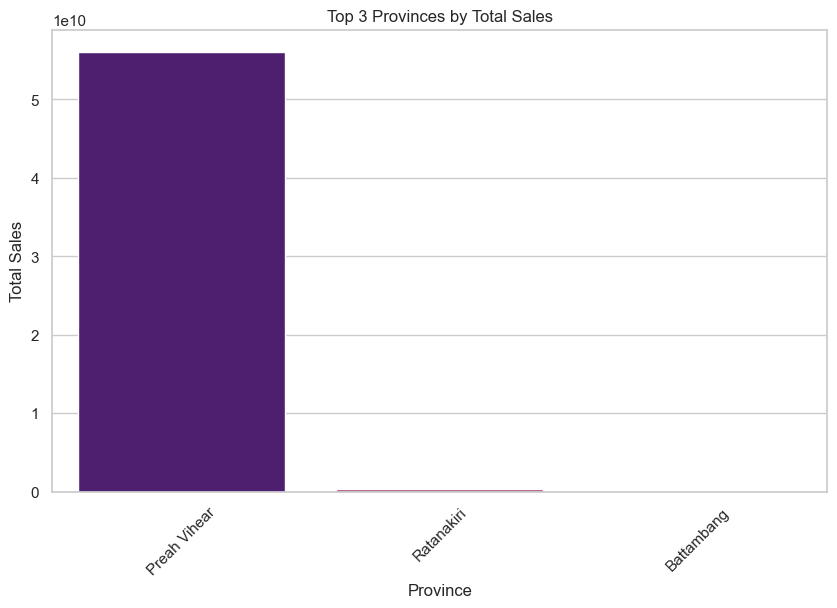

In [33]:
# Step 8: Optional - Sales trend by province (Top 3)
if 'province' in df.columns:
    sales_by_province = df.groupby('province')['total_sales'].sum().sort_values(ascending=False).head(3)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=sales_by_province.index, y=sales_by_province.values, palette="magma")
    plt.title("Top 3 Provinces by Total Sales")
    plt.ylabel("Total Sales")
    plt.xlabel("Province")
    plt.xticks(rotation=45)
    plt.show()
